# Models:


////////

ReLu, CrossEntropy, 1 (16)

ReLu, KL Divergence, 3 (16,32,64)

ReLu, CrossEntropy, 3 (16,32,64)

ReLu, KL Divergence, 5 (16,  32,64, 128, 256)

ReLu, CrossEntropy, 5 (16, 32, 64, 128, 256)

ReLu, KL Divergence, 7 (16,32,64, 128, 256, 512, 1024)

ReLu, CrossEntropy, 7 (16,32,64, 128, 256, 512, 1024)

ReLu, KL Divergence, 9 (16,32,64, 128, 128, 256, 512, 1024, 1024)

////////


Sigmoid, CrossEntropy, 5 (16, 32, 64, 128, 256)

Sigmoid, KL Divergence, 7 (16,32,64, 128, 256, 512, 1024)

Sigmoid, CrossEntropy, 7 (16,32,64, 128, 256, 512, 1024)

Sigmoid, KL Divergence, 9 (16,32,64, 128, 128, 256, 512, 1024, 1024)

Sigmoid, CrossEntropy, 9 (16,32,64, 128, 128, 256, 512, 1024, 1024)

Sigmoid, KL Divergence, 1 (16)

Sigmoid, CrossEntropy, 1 (16)

Sigmoid, KL Divergence, 3 (16,32,64)



////////

TanH, CrossEntropy,  9 (16,32,64, 128, 128, 256, 512, 1024, 1024)

TanH, KL Divergence, 1 (16)

TanH, CrossEntropy, 1 (16)

TanH, KL Divergence, 3 (16,32,64)

TanH, CrossEntropy, 3 (16,32,64)

TanH, KL Divergence,  5 (16, 32, 64, 128, 256)

TanH, CrossEntropy,  5 (16, 32, 64, 128, 256)

TanH, KL Divergence, 7 (16,32,64, 128, 256, 512, 1024)


In [ ]:
from torchvision import datasets,transforms
from torch import nn,optim
import torch.nn.functional as F
import torch
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/.pytorch/F_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/F_MNIST_data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
def convert_labels_to_one_hot(labels, number_of_classes):
    number_of_observations = labels.size()[0]
    labels_one_hot = torch.zeros(number_of_observations, number_of_classes)
    for i in range(number_of_observations):
        label_value = labels[i]
        labels_one_hot[i, label_value] = 1.0
    return labels_one_hot 

In [ ]:
def KLDiv_model_one(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,16)
            self.hd2 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = F.log_softmax(self.hd2(x), dim = 1)
        
            return x
    
    model = Network()
    criterion = nn.KLDivLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            one_hot_labels = convert_labels_to_one_hot(labels,10)
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,one_hot_labels)
        
            t_train_loss += loss.item()
        
            probs = torch.exp(outputs)
            _,top_class = probs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    one_hot_labels = convert_labels_to_one_hot(labels,10)
                    outputs = model(images)
                    loss = criterion(outputs,one_hot_labels)
                    t_test_loss += loss.item()
                    
                    probs = torch.exp(outputs)
                    _,top_class = probs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def KLDiv_model_two(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,64)
            self.hd2 = nn.Linear(64,32)
            self.hd3 = nn.Linear(32,16)
            self.hd4 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = F.log_softmax(self.hd4(x), dim = 1)
        
            return x
    
    model = Network()
    criterion = nn.KLDivLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            one_hot_labels = convert_labels_to_one_hot(labels,10)
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,one_hot_labels)
        
            t_train_loss += loss.item()
        
            probs = torch.exp(outputs)
            _,top_class = probs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    one_hot_labels = convert_labels_to_one_hot(labels,10)
                    outputs = model(images)
                    loss = criterion(outputs,one_hot_labels)
                    t_test_loss += loss.item()
                    
                    probs = torch.exp(outputs)
                    _,top_class = probs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def KLDiv_model_three(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,256)
            self.hd2 = nn.Linear(256,128)
            self.hd3 = nn.Linear(128,64)
            self.hd4 = nn.Linear(64,32)
            self.hd5 = nn.Linear(32,16)
            self.hd6 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = self.dropout(act(self.hd4(x)))
            x = self.dropout(act(self.hd5(x)))
            x = F.log_softmax(self.hd6(x), dim = 1)
        
            return x
    
    model = Network()
    criterion = nn.KLDivLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            one_hot_labels = convert_labels_to_one_hot(labels,10)
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,one_hot_labels)
        
            t_train_loss += loss.item()
        
            probs = torch.exp(outputs)
            _,top_class = probs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    one_hot_labels = convert_labels_to_one_hot(labels,10)
                    outputs = model(images)
                    loss = criterion(outputs,one_hot_labels)
                    t_test_loss += loss.item()
                    
                    probs = torch.exp(outputs)
                    _,top_class = probs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def KLDiv_model_four(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,1024)
            self.hd2 = nn.Linear(1024,512)
            self.hd3 = nn.Linear(512,256)
            self.hd4 = nn.Linear(256,128)
            self.hd5 = nn.Linear(128,64)
            self.hd6 = nn.Linear(64,32)
            self.hd7 = nn.Linear(32,16)
            self.hd8 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = self.dropout(act(self.hd4(x)))
            x = self.dropout(act(self.hd5(x)))
            x = self.dropout(act(self.hd6(x)))
            x = self.dropout(act(self.hd7(x)))
            x = F.log_softmax(self.hd8(x), dim = 1)
        
            return x
    
    model = Network()
    criterion = nn.KLDivLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            one_hot_labels = convert_labels_to_one_hot(labels,10)
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,one_hot_labels)
        
            t_train_loss += loss.item()
        
            probs = torch.exp(outputs)
            _,top_class = probs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    one_hot_labels = convert_labels_to_one_hot(labels,10)
                    outputs = model(images)
                    loss = criterion(outputs,one_hot_labels)
                    t_test_loss += loss.item()
                    
                    probs = torch.exp(outputs)
                    _,top_class = probs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def KLDiv_model_five(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,1024)
            self.hd2 = nn.Linear(1024,1024)
            self.hd3 = nn.Linear(1024,512)
            self.hd4 = nn.Linear(512,256)
            self.hd5 = nn.Linear(256,128)
            self.hd6 = nn.Linear(128,128)
            self.hd7 = nn.Linear(128,64)
            self.hd8 = nn.Linear(64,32)
            self.hd9 = nn.Linear(32,16)
            self.hd10 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = self.dropout(act(self.hd4(x)))
            x = self.dropout(act(self.hd5(x)))
            x = self.dropout(act(self.hd6(x)))
            x = self.dropout(act(self.hd7(x)))
            x = self.dropout(act(self.hd8(x)))
            x = self.dropout(act(self.hd9(x)))
            x = F.log_softmax(self.hd10(x), dim = 1)
        
            return x
    
    model = Network()
    criterion = nn.KLDivLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            one_hot_labels = convert_labels_to_one_hot(labels,10)
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,one_hot_labels)
        
            t_train_loss += loss.item()
        
            probs = torch.exp(outputs)
            _,top_class = probs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    one_hot_labels = convert_labels_to_one_hot(labels,10)
                    outputs = model(images)
                    loss = criterion(outputs,one_hot_labels)
                    t_test_loss += loss.item()
                    
                    probs = torch.exp(outputs)
                    _,top_class = probs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def CrossEnt_model_one(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,16)
            self.hd2 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.hd2(x)
        
            return x
    
    model = Network()
    criterion = nn.CrossEntropyLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,labels)
        
            t_train_loss += loss.item()
        
            _,top_class = outputs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    outputs = model(images)
                    loss = criterion(outputs,labels)
                    t_test_loss += loss.item()
                    
                    _,top_class = outputs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def CrossEnt_model_two(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,64)
            self.hd2 = nn.Linear(64,32)
            self.hd3 = nn.Linear(32,16)
            self.hd4 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = self.hd4(x)
        
            return x
    
    model = Network()
    criterion = nn.CrossEntropyLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,labels)
        
            t_train_loss += loss.item()
        
            _,top_class = outputs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    outputs = model(images)
                    loss = criterion(outputs,labels)
                    t_test_loss += loss.item()
                    
                  
                    _,top_class = outputs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def CrossEnt_model_three(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,256)
            self.hd2 = nn.Linear(256,128)
            self.hd3 = nn.Linear(128,64)
            self.hd4 = nn.Linear(64,32)
            self.hd5 = nn.Linear(32,16)
            self.hd6 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = self.dropout(act(self.hd4(x)))
            x = self.dropout(act(self.hd5(x)))
            x = self.hd6(x)
        
            return x
    
    model = Network()
    criterion = nn.CrossEntropyLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,labels)
        
            t_train_loss += loss.item()
        
            _,top_class = outputs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    outputs = model(images)
                    loss = criterion(outputs,labels)
                    t_test_loss += loss.item()
                    
                  
                    _,top_class = outputs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def CrossEnt_model_four(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,1024)
            self.hd2 = nn.Linear(1024,512)
            self.hd3 = nn.Linear(512,256)
            self.hd4 = nn.Linear(256,128)
            self.hd5 = nn.Linear(128,64)
            self.hd6 = nn.Linear(64,32)
            self.hd7 = nn.Linear(32,16)
            self.hd8 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = self.dropout(act(self.hd4(x)))
            x = self.dropout(act(self.hd5(x)))
            x = self.dropout(act(self.hd6(x)))
            x = self.dropout(act(self.hd7(x)))
            x = self.hd8(x)
        
            return x
    
    model = Network()
    criterion = nn.CrossEntropyLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,labels)
        
            t_train_loss += loss.item()
        
            _,top_class = outputs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    outputs = model(images)
                    loss = criterion(outputs,labels)
                    t_test_loss += loss.item()
                    
                  
                    _,top_class = outputs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
def CrossEnt_model_five(activation,n_epochs):
    act = None
    if activation == 'relu':
        act = F.relu
    elif activation == 'sigmoid':
        act = F.sigmoid
    elif activation == 'tanh':
        act = F.tanh
    class Network(nn.Module):
        def __init__(self):
            super().__init__()
            self.hd1 = nn.Linear(784,1024)
            self.hd2 = nn.Linear(1024,1024)
            self.hd3 = nn.Linear(1024,512)
            self.hd4 = nn.Linear(512,256)
            self.hd5 = nn.Linear(256,128)
            self.hd6 = nn.Linear(128,128)
            self.hd7 = nn.Linear(128,64)
            self.hd8 = nn.Linear(64,32)
            self.hd9 = nn.Linear(32,16)
            self.hd10 = nn.Linear(16,10)
            
            self.dropout = nn.Dropout(p = 0.3)
        
        def forward(self,x):
            x = x.view(x.shape[0],-1)
            x = self.dropout(act(self.hd1(x)))
            x = self.dropout(act(self.hd2(x)))
            x = self.dropout(act(self.hd3(x)))
            x = self.dropout(act(self.hd4(x)))
            x = self.dropout(act(self.hd5(x)))
            x = self.dropout(act(self.hd6(x)))
            x = self.dropout(act(self.hd7(x)))
            x = self.dropout(act(self.hd8(x)))
            x = self.dropout(act(self.hd9(x)))
            x = self.hd10(x)
        
            return x
    
    model = Network()
    criterion = nn.CrossEntropyLoss(reduction = 'sum')
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    training_loss = []
    testing_loss = []

    training_accuracy = []
    testing_accuracy = []

    for i in range(n_epochs):
        t_train_loss = 0
        train_correct = 0
        for images, labels in trainloader:
            optimizer.zero_grad()
        
            outputs = model(images)
            loss = criterion(outputs,labels)
        
            t_train_loss += loss.item()
        
            _,top_class = outputs.topk(1,dim = 1)
            equals = (top_class == labels.view(*top_class.shape))
            train_correct += equals.sum().item()
        
            loss.backward()
            optimizer.step()
        
        else:
            t_test_loss = 0
            test_correct = 0
            
            with torch.no_grad():
                for images, labels in testloader:
                    outputs = model(images)
                    loss = criterion(outputs,labels)
                    t_test_loss += loss.item()
                    
                  
                    _,top_class = outputs.topk(1,dim = 1)
                    equals = (top_class == labels.view(*top_class.shape))
                    test_correct += equals.sum().item()
                    
            train_loss = t_train_loss/len(trainloader.dataset)
            test_loss = t_test_loss/len(testloader.dataset)
            
            training_loss.append(train_loss)
            testing_loss.append(test_loss)
            
            training_accuracy.append(train_correct/len(trainloader.dataset))
            testing_accuracy.append(test_correct/len(testloader.dataset))
    
    return training_loss,testing_loss,training_accuracy,testing_accuracy

In [ ]:
tanh_training_loss = []
tanh_testing_loss = []
tanh_training_accuracy = []
tanh_testing_accuracy = []

In [ ]:
i = 'relu'
n_epochs = 30

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


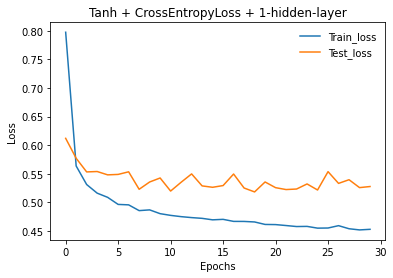

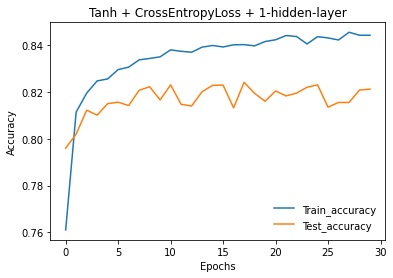

In [ ]:
i = 'relu'
n_epochs = 30

training_loss,testing_loss,training_accuracy,testing_accuracy = CrossEnt_model_one(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + CrossEntropyLoss + 1-hidden-layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('11.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + CrossEntropyLoss + 1-hidden-layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('12.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

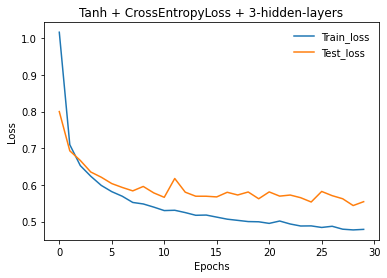

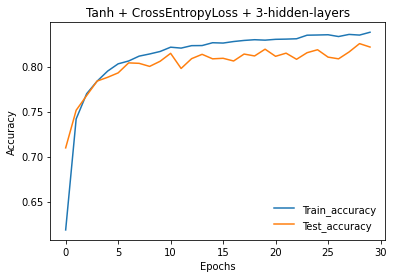

NameError: ignored

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = CrossEnt_model_two(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + CrossEntropyLoss + 3-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('21.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + CrossEntropyLoss + 3-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('22.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


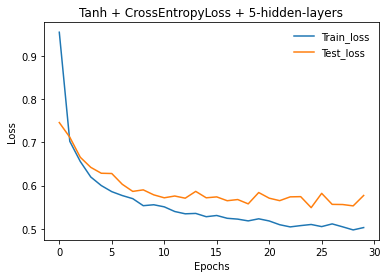

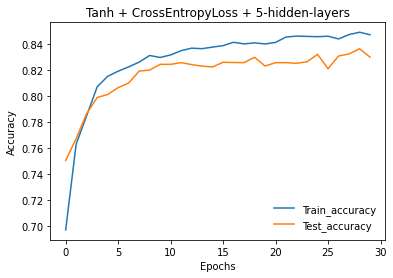

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = CrossEnt_model_three(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + CrossEntropyLoss + 5-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('31.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + CrossEntropyLoss + 5-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('32.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


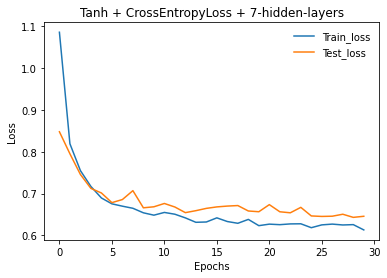

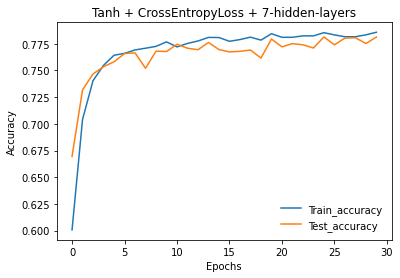

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = CrossEnt_model_four(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + CrossEntropyLoss + 7-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('41.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + CrossEntropyLoss + 7-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('42.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


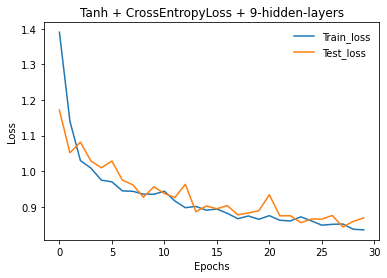

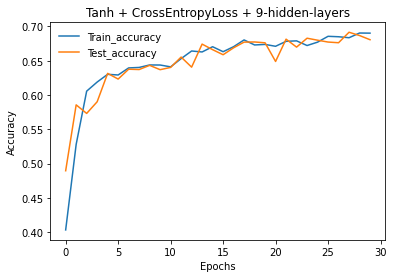

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = CrossEnt_model_five(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + CrossEntropyLoss + 9-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('51.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + CrossEntropyLoss + 9-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('52.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


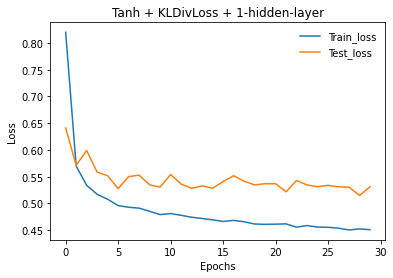

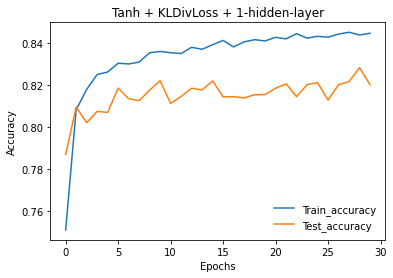

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = KLDiv_model_one(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + KLDivLoss + 1-hidden-layer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('61.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + KLDivLoss + 1-hidden-layer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('62.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


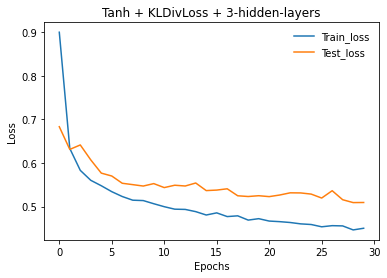

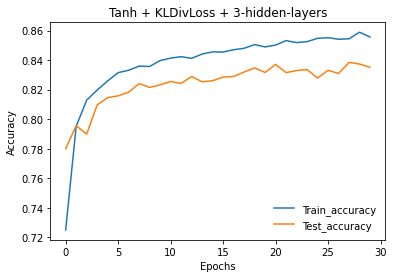

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = KLDiv_model_two(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + KLDivLoss + 3-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('71.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + KLDivLoss + 3-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('72.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


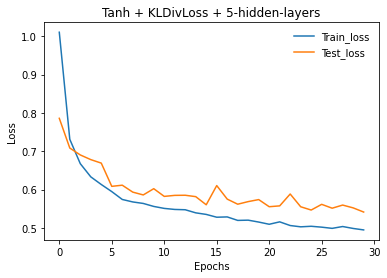

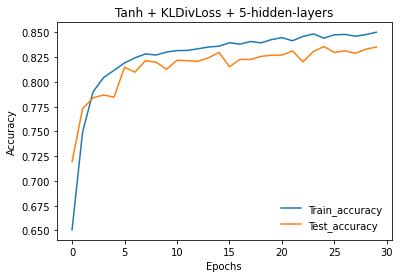

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = KLDiv_model_three(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + KLDivLoss + 5-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('81.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + KLDivLoss + 5-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('82.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


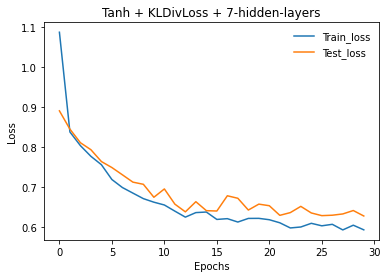

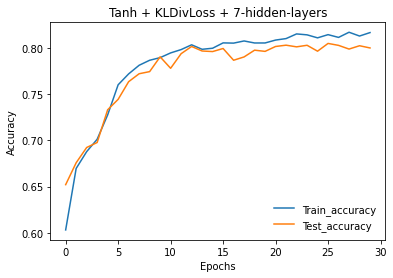

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = KLDiv_model_four(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + KLDivLoss + 7-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('91.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + KLDivLoss + 7-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('92.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


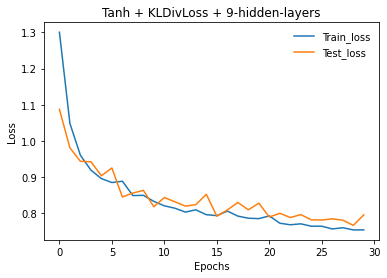

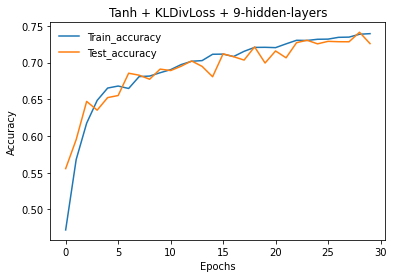

In [ ]:
training_loss,testing_loss,training_accuracy,testing_accuracy = KLDiv_model_five(i,n_epochs)
plt.plot(training_loss,label = 'Train_loss')
plt.plot(testing_loss,label = 'Test_loss')
plt.title('Tanh + KLDivLoss + 9-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(frameon = False)
plt.savefig('101.jpg')
plt.show()


plt.plot(training_accuracy, label = 'Train_accuracy')
plt.plot(testing_accuracy, label = 'Test_accuracy')
plt.title('Tanh + KLDivLoss + 9-hidden-layers')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(frameon = False)
plt.savefig('102.jpg')
plt.show()

tanh_training_loss.append(training_loss[-1])
tanh_testing_loss.append(testing_loss[-1])
tanh_training_accuracy.append(training_accuracy[-1])
tanh_testing_accuracy.append(testing_accuracy[-1])

Text(0.5, 1.0, 'Hello')

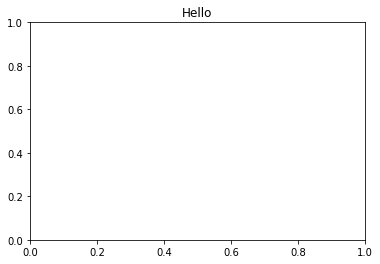

In [ ]:
plt.title('Hello')

In [ ]:
import pickle

In [ ]:
open_file = open('tanh1.pkl','wb')
pickle.dump(tanh_training_loss,open_file)
open_file = open('tanh2.pkl','wb')
pickle.dump(tanh_testing_loss,open_file)
open_file = open('tanh3.pkl','wb')
pickle.dump(tanh_training_accuracy,open_file)
open_file = open('tanh4.pkl','wb')
pickle.dump(tanh_testing_accuracy,open_file)

In [ ]:
open_file = open('tanh4.pkl','rb')
pickle.load(open_file)

[0.8212,
 0.8342,
 0.8297,
 0.7813,
 0.6807,
 0.8201,
 0.8351,
 0.8352,
 0.7999,
 0.7258]